In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
# import some librarys
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import KFold
from collections import Counter

In [4]:
# hyperparameter for keras model an tensorflow tokenizer and cross validation
vocab_size = 45000
embedding_dim = 18
max_length = 0
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [5]:
# you have to change the path
dataSet1 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/article_and_tweets_with_cleaning.csv', sep = ",")
dataSet2 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/article_and_tweets_without_cleaning.csv', sep = ",")
dataSet3 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_with_cleaning.csv', sep = ",")
dataSet4 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_without_cleaning.csv', sep = ",")
dataSet_array = [dataSet1, dataSet2, dataSet3, dataSet4]

In [6]:
# plot graphs method
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

------------------------------------------------------------
!!!!!  sub-experiment with keras sequential model number 4  !!!!!
!!!!!  dataset used is : tweets without cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({True: 8937, False: 8929})
     In testing: Counter({False: 997, True: 989})
Epoch 1/15
559/559 - 8s - loss: 0.6348 - accuracy: 0.6704 - precision: 0.7420 - recall: 0.5229 - val_loss: 0.4730 - val_accuracy: 0.8620 - val_precision: 0.8090 - val_recall: 0.9464 - 8s/epoch - 14ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3543 - accuracy: 0.8732 - precision: 0.8759 - recall: 0.8696 - val_loss: 0.2811 - val_accuracy: 0.9003 - val_precision: 0.9133 - val_recall: 0.8837 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2306 - accuracy: 0.9172 - precision: 0.9152 - recall: 0.9195 - val_loss: 0.2245 - val_accuracy: 0.9149 - val_precision: 0.9035 - val_recall: 0.9282 - 6s/epoch - 10ms

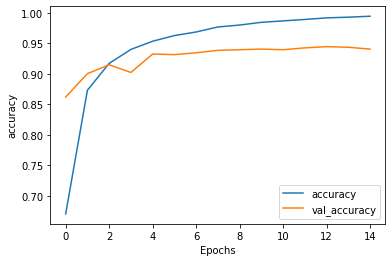

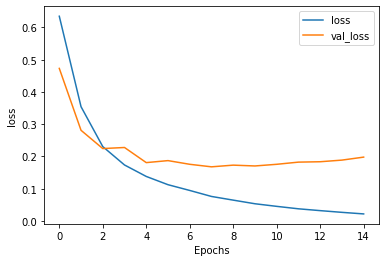

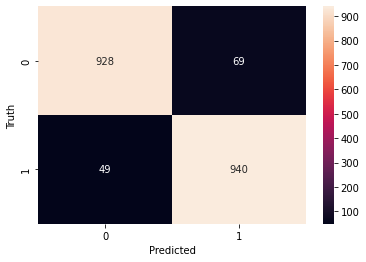

              precision    recall  f1-score   support

       False       0.95      0.93      0.94       997
        True       0.93      0.95      0.94       989

    accuracy                           0.94      1986
   macro avg       0.94      0.94      0.94      1986
weighted avg       0.94      0.94      0.94      1986

             !!!!!  split number : 2  !!!!!
     In training: Counter({True: 8941, False: 8925})
     In testing: Counter({False: 1001, True: 985})
Epoch 1/15
559/559 - 7s - loss: 0.6349 - accuracy: 0.6759 - precision: 0.7757 - recall: 0.4956 - val_loss: 0.4956 - val_accuracy: 0.8258 - val_precision: 0.7546 - val_recall: 0.9614 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3572 - accuracy: 0.8769 - precision: 0.8791 - recall: 0.8743 - val_loss: 0.3068 - val_accuracy: 0.8837 - val_precision: 0.8465 - val_recall: 0.9350 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2387 - accuracy: 0.9150 - precision: 0.9125 - recall: 0.9181 - val_loss: 0.2393 -

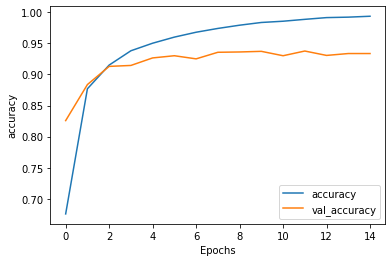

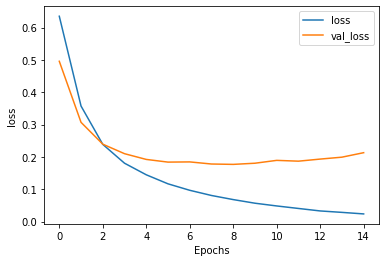

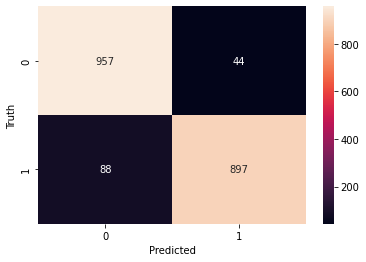

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      1001
        True       0.95      0.91      0.93       985

    accuracy                           0.93      1986
   macro avg       0.93      0.93      0.93      1986
weighted avg       0.93      0.93      0.93      1986

             !!!!!  split number : 3  !!!!!
     In training: Counter({True: 8937, False: 8930})
     In testing: Counter({False: 996, True: 989})
Epoch 1/15
559/559 - 8s - loss: 0.6257 - accuracy: 0.6814 - precision: 0.7110 - recall: 0.6115 - val_loss: 0.4587 - val_accuracy: 0.8539 - val_precision: 0.8319 - val_recall: 0.8857 - 8s/epoch - 14ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3391 - accuracy: 0.8797 - precision: 0.8803 - recall: 0.8789 - val_loss: 0.2961 - val_accuracy: 0.8741 - val_precision: 0.9147 - val_recall: 0.8241 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2233 - accuracy: 0.9215 - precision: 0.9207 - recall: 0.9226 - val_loss: 0.2290 - 

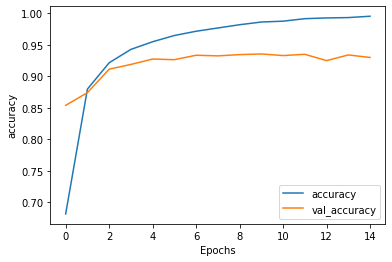

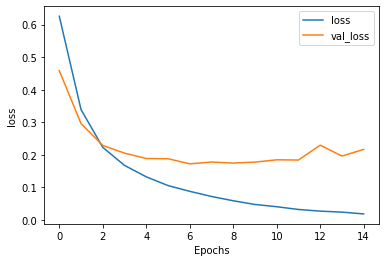

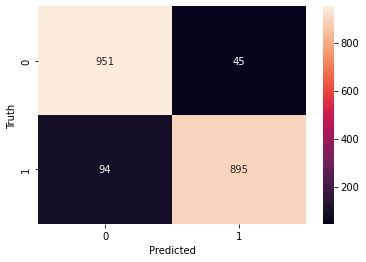

              precision    recall  f1-score   support

       False       0.91      0.95      0.93       996
        True       0.95      0.90      0.93       989

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

             !!!!!  split number : 4  !!!!!
     In training: Counter({True: 8953, False: 8914})
     In testing: Counter({False: 1012, True: 973})
Epoch 1/15
559/559 - 7s - loss: 0.6301 - accuracy: 0.6726 - precision: 0.6841 - recall: 0.6440 - val_loss: 0.4836 - val_accuracy: 0.8458 - val_precision: 0.8279 - val_recall: 0.8654 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3641 - accuracy: 0.8736 - precision: 0.8741 - recall: 0.8735 - val_loss: 0.3247 - val_accuracy: 0.8766 - val_precision: 0.8309 - val_recall: 0.9394 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 5s - loss: 0.2396 - accuracy: 0.9144 - precision: 0.9129 - recall: 0.9167 - val_loss: 0.2848 -

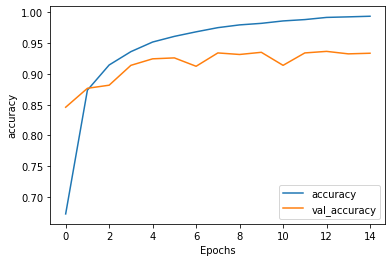

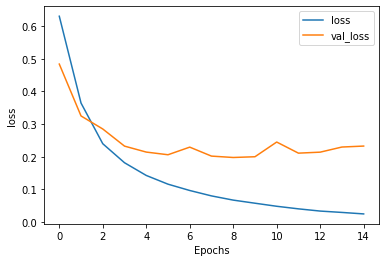

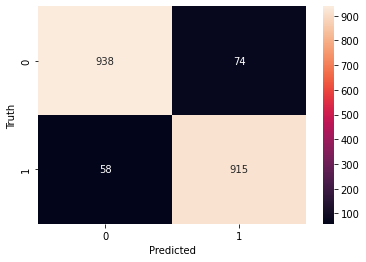

              precision    recall  f1-score   support

       False       0.94      0.93      0.93      1012
        True       0.93      0.94      0.93       973

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

             !!!!!  split number : 5  !!!!!
     In training: Counter({False: 8970, True: 8897})
     In testing: Counter({True: 1029, False: 956})
Epoch 1/15
559/559 - 7s - loss: 0.6349 - accuracy: 0.6831 - precision: 0.7617 - recall: 0.5292 - val_loss: 0.4934 - val_accuracy: 0.7647 - val_precision: 0.9072 - val_recall: 0.6084 - 7s/epoch - 13ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3659 - accuracy: 0.8732 - precision: 0.8782 - recall: 0.8655 - val_loss: 0.3036 - val_accuracy: 0.8922 - val_precision: 0.9087 - val_recall: 0.8805 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2417 - accuracy: 0.9157 - precision: 0.9134 - recall: 0.9177 - val_loss: 0.2528 -

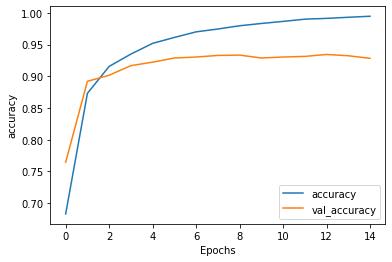

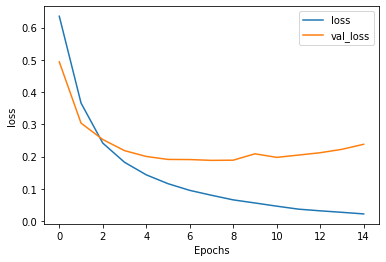

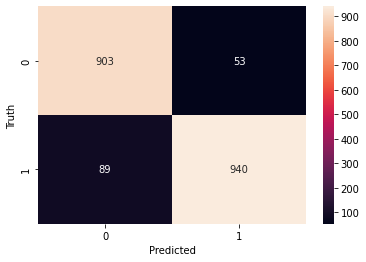

              precision    recall  f1-score   support

       False       0.91      0.94      0.93       956
        True       0.95      0.91      0.93      1029

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

             !!!!!  split number : 6  !!!!!
     In training: Counter({True: 8938, False: 8929})
     In testing: Counter({False: 997, True: 988})
Epoch 1/15
559/559 - 7s - loss: 0.6172 - accuracy: 0.7052 - precision: 0.8327 - recall: 0.5139 - val_loss: 0.4545 - val_accuracy: 0.8388 - val_precision: 0.8719 - val_recall: 0.7925 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 5s - loss: 0.3393 - accuracy: 0.8807 - precision: 0.8813 - recall: 0.8802 - val_loss: 0.2837 - val_accuracy: 0.9013 - val_precision: 0.9008 - val_recall: 0.9008 - 5s/epoch - 10ms/step
Epoch 3/15
559/559 - 5s - loss: 0.2261 - accuracy: 0.9190 - precision: 0.9176 - recall: 0.9208 - val_loss: 0.2277 - 

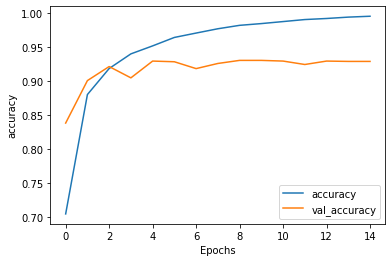

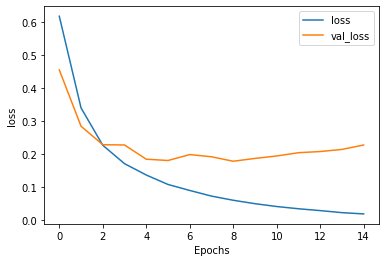

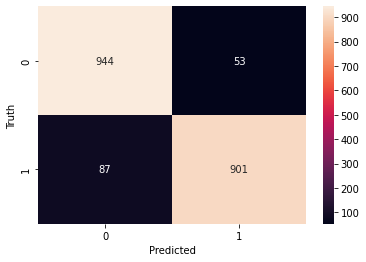

              precision    recall  f1-score   support

       False       0.92      0.95      0.93       997
        True       0.94      0.91      0.93       988

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

             !!!!!  split number : 7  !!!!!
     In training: Counter({True: 8967, False: 8900})
     In testing: Counter({False: 1026, True: 959})
Epoch 1/15
559/559 - 7s - loss: 0.6350 - accuracy: 0.6742 - precision: 0.6690 - recall: 0.6945 - val_loss: 0.4842 - val_accuracy: 0.8554 - val_precision: 0.8060 - val_recall: 0.9228 - 7s/epoch - 13ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3683 - accuracy: 0.8681 - precision: 0.8708 - recall: 0.8655 - val_loss: 0.2904 - val_accuracy: 0.8952 - val_precision: 0.9214 - val_recall: 0.8561 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2440 - accuracy: 0.9157 - precision: 0.9131 - recall: 0.9195 - val_loss: 0.2254 -

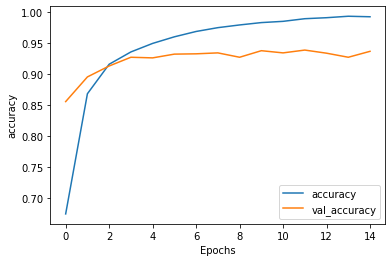

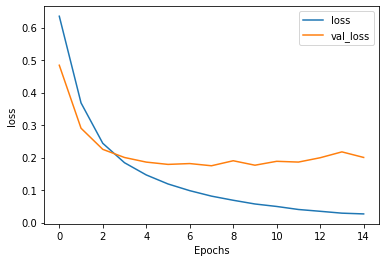

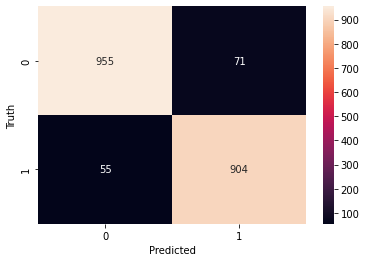

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      1026
        True       0.93      0.94      0.93       959

    accuracy                           0.94      1985
   macro avg       0.94      0.94      0.94      1985
weighted avg       0.94      0.94      0.94      1985

             !!!!!  split number : 8  !!!!!
     In training: Counter({False: 8956, True: 8911})
     In testing: Counter({True: 1015, False: 970})
Epoch 1/15
559/559 - 7s - loss: 0.6353 - accuracy: 0.6858 - precision: 0.7830 - recall: 0.5120 - val_loss: 0.4697 - val_accuracy: 0.8393 - val_precision: 0.8726 - val_recall: 0.8030 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 6s - loss: 0.3549 - accuracy: 0.8738 - precision: 0.8773 - recall: 0.8686 - val_loss: 0.2928 - val_accuracy: 0.8887 - val_precision: 0.9110 - val_recall: 0.8670 - 6s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2337 - accuracy: 0.9172 - precision: 0.9150 - recall: 0.9194 - val_loss: 0.2337 -

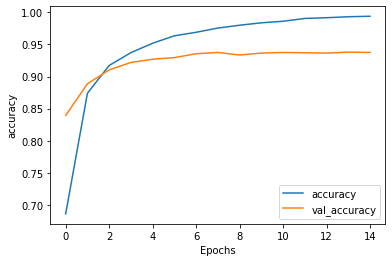

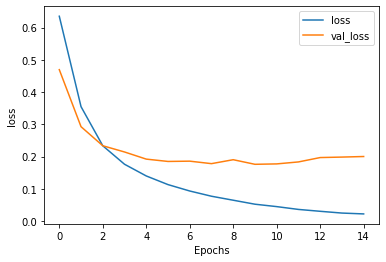

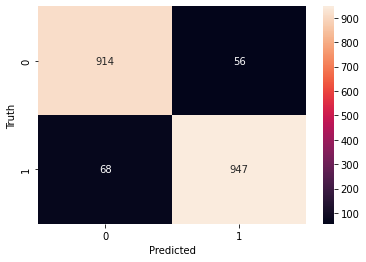

              precision    recall  f1-score   support

       False       0.93      0.94      0.94       970
        True       0.94      0.93      0.94      1015

    accuracy                           0.94      1985
   macro avg       0.94      0.94      0.94      1985
weighted avg       0.94      0.94      0.94      1985

             !!!!!  split number : 9  !!!!!
     In training: Counter({False: 8934, True: 8933})
     In testing: Counter({True: 993, False: 992})
Epoch 1/15
559/559 - 7s - loss: 0.6357 - accuracy: 0.6993 - precision: 0.7384 - recall: 0.6171 - val_loss: 0.4976 - val_accuracy: 0.8418 - val_precision: 0.8338 - val_recall: 0.8540 - 7s/epoch - 13ms/step
Epoch 2/15
559/559 - 5s - loss: 0.3654 - accuracy: 0.8702 - precision: 0.8729 - recall: 0.8666 - val_loss: 0.3239 - val_accuracy: 0.8725 - val_precision: 0.8327 - val_recall: 0.9325 - 5s/epoch - 10ms/step
Epoch 3/15
559/559 - 6s - loss: 0.2420 - accuracy: 0.9145 - precision: 0.9115 - recall: 0.9182 - val_loss: 0.3165 - 

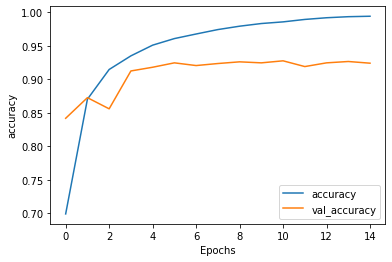

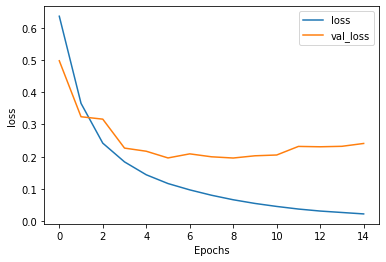

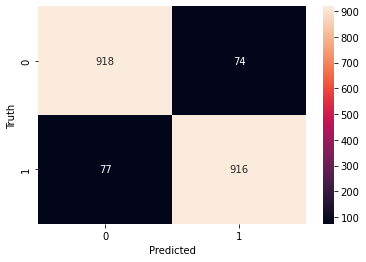

              precision    recall  f1-score   support

       False       0.92      0.93      0.92       992
        True       0.93      0.92      0.92       993

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 10  !!!!!
     In training: Counter({False: 8947, True: 8920})
     In testing: Counter({True: 1006, False: 979})
Epoch 1/15
559/559 - 7s - loss: 0.6208 - accuracy: 0.6843 - precision: 0.7160 - recall: 0.6094 - val_loss: 0.4482 - val_accuracy: 0.8655 - val_precision: 0.8424 - val_recall: 0.9036 - 7s/epoch - 12ms/step
Epoch 2/15
559/559 - 5s - loss: 0.3341 - accuracy: 0.8818 - precision: 0.8805 - recall: 0.8831 - val_loss: 0.2885 - val_accuracy: 0.8947 - val_precision: 0.8686 - val_recall: 0.9334 - 5s/epoch - 10ms/step
Epoch 3/15
559/559 - 5s - loss: 0.2214 - accuracy: 0.9215 - precision: 0.9199 - recall: 0.9231 - val_loss: 0.2370 

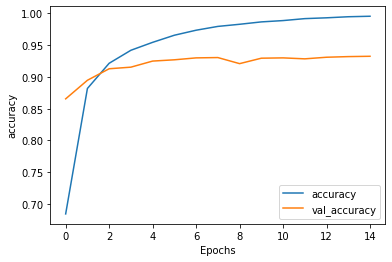

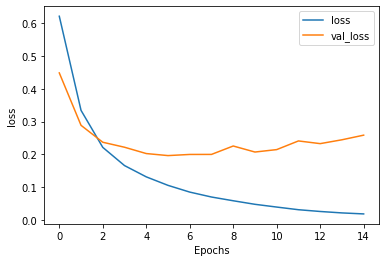

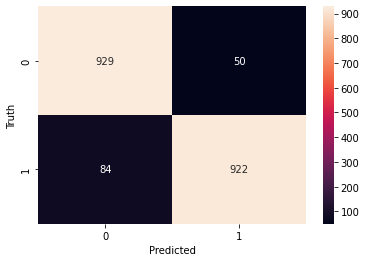

              precision    recall  f1-score   support

       False       0.92      0.95      0.93       979
        True       0.95      0.92      0.93      1006

    accuracy                           0.93      1985
   macro avg       0.93      0.93      0.93      1985
weighted avg       0.93      0.93      0.93      1985

mean accuracy for this sub_experiment is 0.93
mean recall for this sub_experiment is 0.92
mean precision for this sub_experiment is 0.94
mean f1_score for this sub_experiment is 0.93
---------------------------------------------------------
                   End of Experiment
---------------------------------------------------------
mean accuracy for this experiment is 0.23
mean recall for this experiment is 0.23
mean precision for this experiment is 0.23
mean f1_score for this experiment is 0.23


In [8]:
sub_experiment_count = 1
accuracy  = 0
recall    = 0
f1_score  = 0
precision = 0
for dataSet in dataSet_array:
  dataSet_text = dataSet['text']
  dataSet_label = dataSet['label']
  sub_accuracy  = 0
  sub_recall    = 0
  sub_f1_score  = 0
  sub_precision = 0
  print('------------------------------------------------------------')
  #change the maxlen value
  if sub_experiment_count == 1:
    print('!!!!!  sub-experiment with keras sequential model number 1 !!!!!')
    print('!!!!!  dataset used is : article and tweets with cleaning  !!!!!')
    max_length = 2000
  elif sub_experiment_count == 2:
    print('!!!!!  sub-experiment with keras sequential model number 2  !!!!!')
    print('!!!!!  dataset used is : article and tweets without cleaning  !!!!!')
    max_length = 2000
  elif sub_experiment_count == 3:
    print('!!!!!  sub-experiment with keras sequential model number 3  ')
    print('!!!!!  dataset used is : tweets with cleaning  !!!!!')
    max_length = 250
  elif sub_experiment_count == 4:
    print('!!!!!  sub-experiment with keras sequential model number 4  !!!!!')
    print('!!!!!  dataset used is : tweets without cleaning  !!!!!')
    max_length = 250
  print('------------------------------------------------------------')
  
  #cross validation counter
  split = 1
  kfold = KFold(n_splits=10, shuffle=True)

  #cross validation loop
  for train, test in kfold.split(dataSet_text, dataSet_label):
    #create the tokenizer and fit the tokenizer dictionary
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(dataSet_text[train])
    #convert texts to sequences
    training_sequences = tokenizer.texts_to_sequences(dataSet_text[train])
    testing_sequences = tokenizer.texts_to_sequences(dataSet_text[test])
    #make the sequences in the same length
    training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)    
    testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    #convert the vectors to np array
    training_padded = np.array(training_padded)
    training_labels = np.array(dataSet_label[train])
    testing_padded = np.array(testing_padded)
    testing_labels = np.array(dataSet_label[test])

    #some output
    print('             !!!!!  split number : '+ str(split) + '  !!!!!')
    print('     ' + f'In training: {Counter(training_labels)}')
    print('     ' + f'In testing: {Counter(testing_labels)}')

    #create the keras model with 4 layers
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    #create the metrics array
    metrics_array = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    #compile the model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=metrics_array)

    #model training with 15 epochs
    history = model.fit(training_padded, training_labels, epochs=15, validation_data=(testing_padded, testing_labels), verbose=2)

    #call the method plot_graphs for some statistic
    plot_graphs(history, "accuracy")
    plot_graphs(history, "loss")
    
    # testing the model
    lable_predicted = model.predict(testing_padded)
    lable_predicted = lable_predicted.flatten()
    lable_predicted = np.where(lable_predicted > 0.5, 1, 0)

    # create and show the confusion matrix
    cm = metrics.confusion_matrix(testing_labels, lable_predicted)
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    
    #show the classification report 
    print(metrics.classification_report(testing_labels, lable_predicted))

    #add the new metrics result from the new cross val. to the old  metrics result from the old cross val.
    sub_accuracy  = sub_accuracy + metrics.accuracy_score(testing_labels, lable_predicted)
    sub_recall    = sub_recall + metrics.recall_score(testing_labels, lable_predicted)
    sub_f1_score  = sub_f1_score + metrics.f1_score(testing_labels, lable_predicted)
    sub_precision = sub_precision + metrics.precision_score(testing_labels, lable_predicted)

    #indexing
    split = split + 1
  #compute the mean of the using metrics in the cross val.
  sub_accuracy  = sub_accuracy / 10
  sub_recall    = sub_recall / 10
  sub_f1_score  = sub_f1_score / 10
  sub_precision = sub_precision / 10

  #some output
  print("mean accuracy for this sub_experiment is " + str(round(sub_accuracy, 2)))
  print("mean recall for this sub_experiment is " + str(round(sub_recall, 2)))
  print("mean precision for this sub_experiment is " + str(round(sub_precision, 2)))
  print("mean f1_score for this sub_experiment is " + str(round(sub_f1_score, 2)))

  #add the new metrics result from the new sub experiment to the old  metrics result from the old sub experiments
  accuracy  = accuracy + sub_accuracy
  recall    = recall + sub_recall
  precision = precision + sub_precision
  f1_score  = f1_score + sub_f1_score

  #indexing
  sub_experiment_count = sub_experiment_count + 1
  
  

#compute the mean of the using metrics for the 4 sub experiments.
accuracy  = accuracy / 4
recall    = recall / 4
f1_score  = f1_score / 4
precision = precision / 4

#some output
print('---------------------------------------------------------')
print('                   End of Experiment')
print('---------------------------------------------------------')

print("mean accuracy for this experiment is " + str(round(accuracy, 2)))
print("mean recall for this experiment is " + str(round(recall, 2)))
print("mean precision for this experiment is " + str(round(precision, 2)))
print("mean f1_score for this experiment is " + str(round(f1_score, 2)))

In [26]:
#model description
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_40 (Embedding)    (None, 250, 18)           810000    
                                                                 
 global_average_pooling1d_40  (None, 18)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_80 (Dense)            (None, 24)                456       
                                                                 
 dense_81 (Dense)            (None, 1)                 25        
                                                                 
Total params: 810,481
Trainable params: 810,481
Non-trainable params: 0
_________________________________________________________________
